#1. Importación de librerías
¿Qué hacemos aquí?
En esta sección vamos a importar las librerías necesarias para trabajar con redes neuronales y procesamiento numérico en Python. Usaremos principalmente numpy para los datos y tensorflow (o keras) para construir y entrenar la red.
Estas herramientas nos permiten manejar datos de manera eficiente y crear modelos de aprendizaje automático.

In [1]:
#Tensorflow / Pytorch

In [3]:
from google.colab import files
uploaded = files.upload()


Saving celsius (2).csv to celsius (2).csv


In [5]:
import pandas as pd

datos = pd.read_csv("celsius (2).csv")

In [6]:
datos.head()

,celsius,fahrenheit
0,-40,-40.0
1,-10,14.0
2,0,32.0
3,8,46.4
4,15,59.0


In [7]:
datos["celsius"].values

array([-40, -10,   0,   8,  15,  22,  38])

#2. Definición de los datos
¿Qué hacemos aquí?
Acá definimos nuestros datos de entrada y salida.
Por un lado, vamos a tener una lista de temperaturas en grados Celsius, y por otro lado, sus equivalentes en grados Fahrenheit.
Estos datos serán usados para enseñar a la red a encontrar la relación matemática entre ambas escalas de temperatura.

In [8]:
X = datos["celsius"].values
y = datos["fahrenheit"].values

#3. Construcción del modelo
¿Qué hacemos aquí?
Ahora vamos a crear la estructura de la red neuronal.
En este caso, como es una relación sencilla (una recta), usamos una red simple con muy pocas neuronas.
Definimos las capas y la forma en que la red va a intentar aprender la relación entre Celsius y Fahrenheit.

In [9]:
import tensorflow as tf

modelo = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)), #la entrada, los celsius: 1 solo dato
    tf.keras.layers.Dense(units=1), #la salida. Tambien es un dato: Los grados fahrenheit
])



#4. Compilación del modelo
¿Qué hacemos aquí?
Aquí configuramos cómo la red va a “aprender”.
Le decimos qué función de error usar (para saber qué tan lejos está su respuesta de la real) y qué algoritmo utilizará para ajustar sus pesos y mejorar en cada paso.

In [10]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(.1),
    loss="mean_squared_error"
)

#5. Entrenamiento del modelo
¿Qué hacemos aquí?
En esta etapa, el modelo analiza los ejemplos de Celsius y Fahrenheit que le damos, ajustando sus parámetros para poder predecir la salida correcta.
Cada ciclo se llama época. Mientras más épocas, más aprende (aunque no siempre conviene pasarse).
Acá es donde realmente la red “aprende”.

In [ ]:
entrenamiento = modelo.fit(X, y, epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step - loss: 8473.0576
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 8059.7256
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 7658.1147
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 7268.4194
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 6890.8154
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 6525.4575
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 6172.4780
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 5831.9937
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 5504.0923
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 5188.8394
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 4886.2749
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 4596.4111
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 4319.2368
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 4054.7092
Epoch 15/1000
1/1 ━━━━

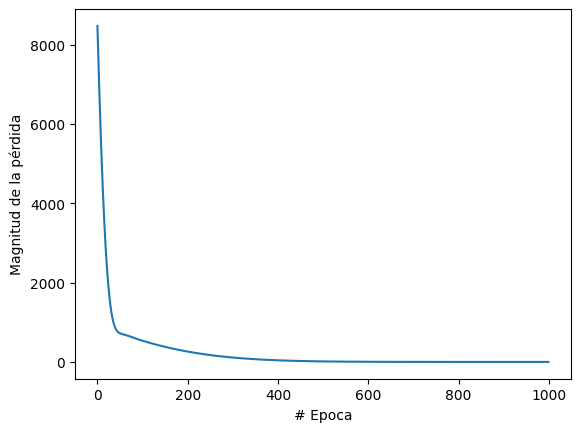

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de la pérdida")
plt.plot(entrenamiento.history["loss"])

# 7. Visualización y análisis de resultados

En esta parte podemos graficar los resultados, comparar las predicciones de la red contra los valores reales, y analizar qué tan bien logró aprender la relación entre las temperaturas.  
Esto es fundamental para entender si la red funciona correctamente y, si no, qué ajustes se pueden hacer.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


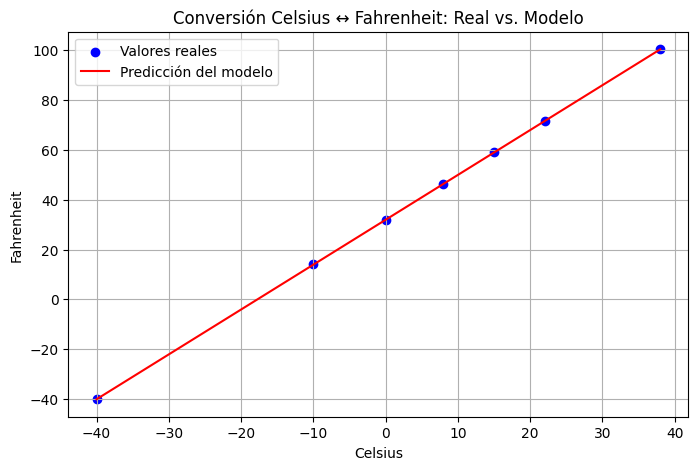

In [ ]:
# Importamos matplotlib por si no estaba importado
import matplotlib.pyplot as plt
import numpy as np

# Definimos los datos de entrada y salida reales (asegurate de que estos sean los que usaste en el entrenamiento)
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46.4, 59, 71.6, 100.4], dtype=float)

# Usamos el modelo ya entrenado para hacer predicciones
fahrenheit_pred = modelo.predict(celsius)

# Graficamos los valores reales vs. las predicciones
plt.figure(figsize=(8,5))
plt.scatter(celsius, fahrenheit, color='blue', label='Valores reales')
plt.plot(celsius, fahrenheit_pred, color='red', label='Predicción del modelo')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.title('Conversión Celsius ↔ Fahrenheit: Real vs. Modelo')
plt.legend()
plt.grid(True)
plt.show()


#6. Evaluación y predicción
¿Qué hacemos aquí?
Una vez entrenado, probamos el modelo con nuevos valores de Celsius para ver si sabe convertirlos bien a Fahrenheit.
También podemos ver el error final, o analizar los pesos aprendidos por la red.

In [ ]:
import numpy as np # Import the numpy library

c = 12
prediccion = modelo.predict(np.array([[c]])) # Convert the input to a NumPy array
print(f"Predicción: {c} celsius son {prediccion[0]} fahrenheit")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicción: 12 celsius son [53.547745] fahrenheit


In [ ]:
print(modelo.layers[0].get_weights())

[array([[1.800507]], dtype=float32), array([31.94166], dtype=float32)]


In [ ]:
#Calculo real para convertir celsius a fahrenheit es
# (C * 1.8) + 32

In [ ]:
#Backpropagation / Propagación hacia atrás.